# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_BOX_API")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
df_info = pd.DataFrame(sfo_data.groupby(sfo_data.index).housing_units.mean())
df_info

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [5]:
# Save the dataframe as a csv file
df_info.to_csv('housing_units_by_year.csv')

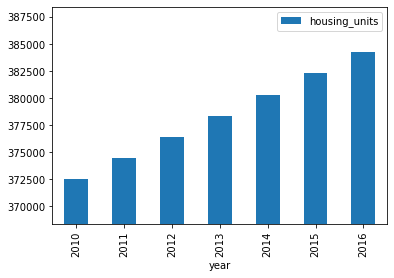

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
df_info.plot.bar(ylim = (df_info.housing_units.min() - df_info.housing_units.std(), df_info.housing_units.max() + df_info.housing_units.std()))

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# Please note that I already did this in the code above.

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
avgs = sfo_data.groupby(sfo_data.index)[['sale_price_sqr_foot','gross_rent']].mean()
avgs

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

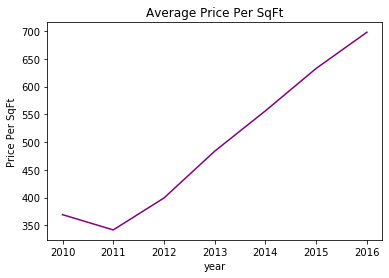

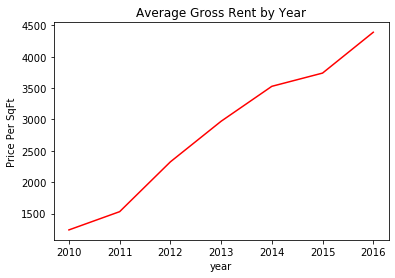

In [8]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
line1 = avgs.sale_price_sqr_foot.plot(c = 'purple')
title = plt.title('Average Price Per SqFt')
ylabel = plt.ylabel('Price Per SqFt')
plt.grid = True
plt.show()

# Line chart for average montly rent
line2 = avgs.gross_rent.plot(c = 'red')
title = plt.title('Average Gross Rent by Year')
ylabel = plt.ylabel('Price Per SqFt')
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
data = sfo_data[['neighborhood','sale_price_sqr_foot']].groupby([sfo_data.index, 'neighborhood']).mean().reset_index().dropna().sort_values(by ='year')
data

year                neighborhood  sale_price_sqr_foot
0    2010                Alamo Square           291.182945
32   2010                 Mission Bay           489.805378
33   2010             Mission Dolores           257.987999
34   2010             Mission Terrace           262.876026
35   2010                    Nob Hill           307.677477
..    ...                         ...                  ...
369  2016              Inner Richmond           403.311132
370  2016                Inner Sunset           445.923828
371  2016  Jordan Park/Laurel Heights           704.566419
361  2016                   Excelsior           534.226250
396  2016               Westwood Park           631.195426

[392 rows x 3 columns]

# [HVPLOT Dropdown](https://github.com/holoviz/hvplot/issues/499)

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
hvplot1 = data.hvplot.line(x = 'year', y = 'sale_price_sqr_foot', groupby ='neighborhood', hover_cols = 'all')
hvplot1

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot,index,neighborhood)

In [11]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
data1 = pd.DataFrame(sfo_data[['neighborhood','gross_rent']].groupby([sfo_data.index, 'neighborhood']).mean().reset_index().dropna().sort_values(by ='year'))
hvplot2 = data1.hvplot.line(x = 'year', y = 'gross_rent', groupby ='neighborhood')
hvplot2

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [12]:
# Getting the data from the top 10 expensive neighborhoods to own
expensive = pd.DataFrame(sfo_data.groupby(['neighborhood']).sale_price_sqr_foot.mean().sort_values(ascending = False).head(10).reset_index())
expensive

neighborhood  sale_price_sqr_foot
0  Union Square District           903.993258
1         Merced Heights           788.844818
2          Miraloma Park           779.810842
3        Pacific Heights           689.555817
4          Westwood Park           687.087575
5         Telegraph Hill           676.506578
6       Presidio Heights           675.350212
7             Cow Hollow           665.964042
8           Potrero Hill           662.013613
9            South Beach           650.124479

In [49]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_plot = expensive.hvplot.bar(figsize = (30,20), x = 'neighborhood', rot = 90)
expensive_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [45]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
a = sfo_data.groupby(['year','neighborhood']).mean().drop(columns = 'housing_units')
a = a.reset_index()
plot1 = a.hvplot.bar(groupby = 'neighborhood', rot = 90, x = 'year', figsize = (30,10))
plot1

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [15]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_plot = expensive.hvplot.bar(figsize = (20,10))
expensive_plot

:Bars   [index]   (sale_price_sqr_foot)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
coordinates = pd.read_csv('Data/neighborhoods_coordinates.csv')
coordinates.columns = ['neighborhood','lat','lon']
coordinates = pd.DataFrame(coordinates)

mean_df = pd.DataFrame(sfo_data.groupby(['neighborhood']).mean())
mean_df.head()

sale_price_sqr_foot  housing_units   gross_rent
neighborhood                                                    
Alamo Square              366.020712       378401.0  2817.285714
Anza Vista                373.382198       379050.0  3031.833333
Bayview                   204.588623       376454.0  2318.400000
Bayview Heights           590.792839       382295.0  3739.000000
Bernal Heights            576.746488       379374.5  3080.333333

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# At this point the data is merged and all mean values are calculated.
new_df = pd.DataFrame(pd.merge(coordinates,mean_df, how = 'left', on = ['neighborhood','neighborhood']).dropna())
new_df.head()

neighborhood        lat         lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
5  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
5       378076.5  2698.833333

In [18]:
# Calculate the mean values for each neighborhood
# Already done above.

In [19]:
# Join the average values with the neighborhood locations
# Already done above

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [20]:
# So I just had to redo my mapbox after the message below popped up. Once it shows up it completely takes over your code and you can't change anything about it. Also I can't seem to get rid of it. So it will just stay here.

In [21]:
# Set the mapbox access token

load_dotenv()

mapbox_api = os.getenv('MAP_BOX_API')

# Create a scatter mapbox to analyze neighborhood info
map_box = px.scatter_mapbox(
    new_df,
    lat="lat",
    lon="lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=10
)
map_box.update_layout(
    mapbox_style="dark")
map_box.show() #display map

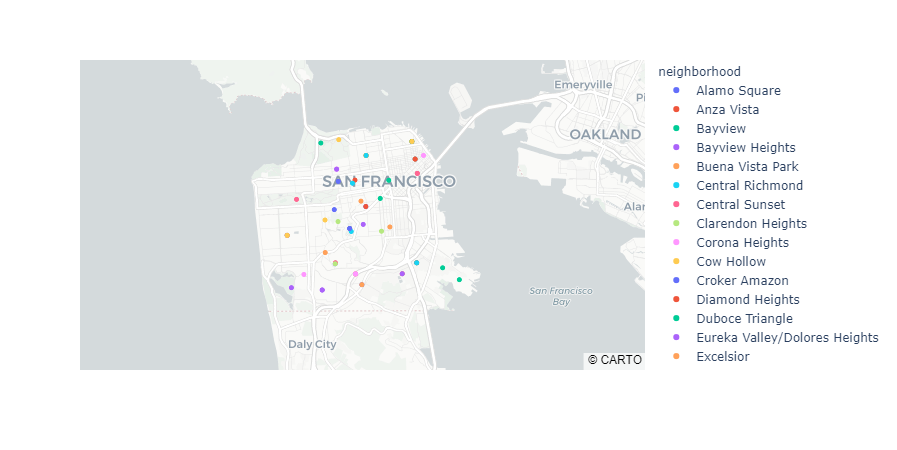

In [50]:
map_box = px.scatter_mapbox(
    new_df,
    lat="lat",
    lon="lon",
    color="neighborhood",
    zoom=10
)
map_box.update_layout(
    mapbox_style="carto-positron")
map_box.show() # Got this almost directly from one of the activities.

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [65]:
# Fetch the data from all expensive neighborhoods per year.
# df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
# df_expensive_neighborhoods_per_year.head()
new = sfo_data.reset_index()
most_expensive = new.groupby('neighborhood').mean().sort_values(by = 'sale_price_sqr_foot', ascending = False).head(50)
most_expensive['sale_price_sqr_foot'] = np.floor(most_expensive['sale_price_sqr_foot'])
most_expensive['gross_rent'] = np.floor(most_expensive['gross_rent'])
most_expensive = most_expensive.reset_index()

most_expensive['year'] = round(most_expensive['year'])
most_expensive = pd.DataFrame(most_expensive)

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


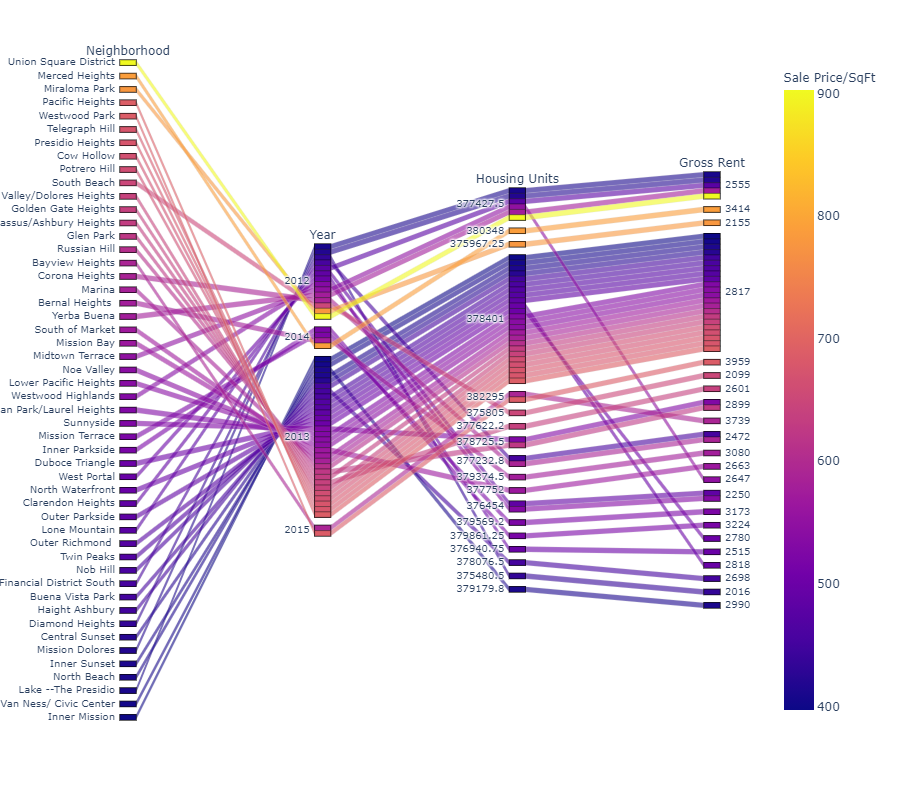

In [66]:
# Parallel Categories Plot
px.parallel_categories(
    most_expensive,
    dimensions = ['neighborhood','year','housing_units','gross_rent'],
    color = 'sale_price_sqr_foot',
    labels={'neighborhood':'Neighborhood', 'sale_price_sqr_foot':'Sale Price/SqFt', 'housing_units':'Housing Units', 'gross_rent':'Gross Rent', 'year':'Year'},
    width = 1400,
    height = 800)

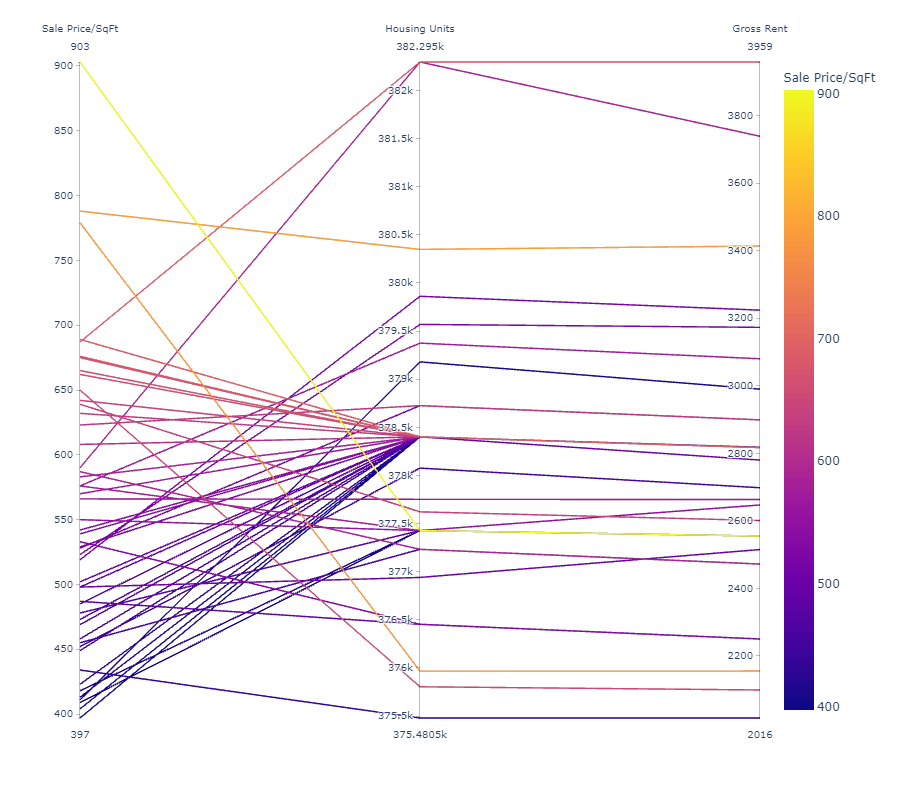

In [67]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    most_expensive,
    dimensions = ['sale_price_sqr_foot', 'housing_units','gross_rent'],
    color = 'sale_price_sqr_foot',
    labels={'sale_price_sqr_foot':'Sale Price/SqFt', 'housing_units':'Housing Units', 'gross_rent':'Gross Rent'},
    width = 1400,
    height = 800)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

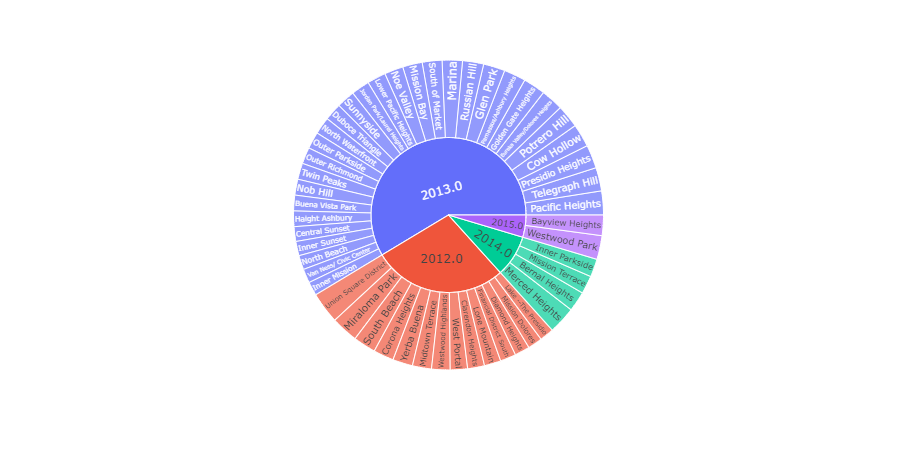

In [69]:
# Sunburst Plot
fig = px.sunburst(most_expensive, path = ['year','neighborhood',], values = 'sale_price_sqr_foot')
fig.show()

In [27]:
# Best I could do.